In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline    
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std

# **Datasets Reading** 

In [2]:
x_train = pd.read_csv('Datasets/X_Train With Yeo Johnson 70-30.csv')

x_test = pd.read_csv('Datasets/X_Test With Yeo Johnson 70-30.csv')

y_train = pd.read_csv('Datasets/Y_Train With Yeo Johnson 70-30.csv')

y_test = pd.read_csv('Datasets/Y_Test With Yeo Johnson 70-30.csv')

In [3]:
x_train

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,-1.137388,2.202823,0.510418,-1.299431,0.235341,0.778119,-0.938461,0.781271,-2.034989,-0.985494,0.185072
1,-1.137388,0.201696,-1.142540,-0.587073,-0.349968,1.171562,0.975980,-0.607760,0.104581,0.307804,0.803995
2,0.879208,2.043540,0.674639,0.544154,0.844023,0.431714,-0.938461,1.269542,0.544650,-0.985494,0.803995
3,0.879208,0.081174,0.323668,0.544154,0.598897,-1.395244,-0.801021,-0.244382,0.461088,1.197842,0.803995
4,0.879208,-0.464061,0.164871,0.183679,-0.893337,0.359901,-0.938461,-0.244382,1.011991,-0.985494,-0.850861
...,...,...,...,...,...,...,...,...,...,...,...
573,0.879208,0.081174,2.440506,1.931843,-0.031354,1.298371,1.131369,1.269542,-0.510034,0.731429,0.803995
574,0.879208,-2.128725,0.272650,0.824669,-0.472766,-0.255488,-0.299102,0.347841,0.104581,2.275286,1.133485
575,0.879208,0.081174,0.466085,0.183679,-0.514066,-0.505172,1.131369,-0.244382,-0.966078,0.948298,1.009968
576,0.879208,-0.256965,1.265659,2.773676,-0.149226,-1.119861,-0.938461,-0.244382,-0.966078,0.604219,0.803995


In [4]:
print(y_train['Class'].value_counts())

2    472
0     73
1     33
Name: Class, dtype: int64


# Backward Feature Elimination using Logistic Regression

In [5]:
# from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# from sklearn.linear_model import LogisticRegression

# lreg = LogisticRegression()
# sfs1 = sfs(lreg, k_features=10, forward=False, verbose=1, scoring='neg_mean_squared_error')
# sfs1 = sfs1.fit(x_train, y_train)

In [6]:
# feat_names = list(sfs1.k_feature_names_)
# print(feat_names)

In [7]:
BFE_Top_4_X = x_train[['Gender', 'AGE', 'Urea', 'HbA1c']]
BFE_Top_5_X = x_train[['Gender', 'AGE', 'Urea', 'HbA1c', 'Chol']]
BFE_Top_7_X = x_train[['Gender', 'AGE', 'Urea', 'HbA1c', 'Chol', 'TG', 'HDL']]
BFE_Top_9_X = x_train[['Gender', 'AGE', 'Urea', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL']]
x_train = BFE_Top_4_X

In [8]:
BFE_Top_4_X = x_test[['Gender', 'AGE', 'Urea', 'HbA1c']]
BFE_Top_5_X = x_test[['Gender', 'AGE', 'Urea', 'HbA1c', 'Chol']]
BFE_Top_7_X = x_test[['Gender', 'AGE', 'Urea', 'HbA1c', 'Chol', 'TG', 'HDL']]
BFE_Top_9_X = x_test[['Gender', 'AGE', 'Urea', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL']]
x_test = BFE_Top_4_X

In [9]:
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict = {}
performance_dict['Metrics'] = metrics

In [10]:
metrics_grid = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict_grid = {}
performance_dict_grid['Metrics'] = metrics_grid

# SMOTETomek Balancing

In [11]:

# from collections import Counter
# from imblearn.combine import SMOTETomek
# counter = Counter(y_train)
# print('Before', counter)
# smtt = SMOTETomek(random_state = 139)
# x_train_smt, y_train_smt = smtt.fit_resample(x_train, y_train)
# counter = Counter(y_train_smt)
# print('After', counter)


In [12]:

# from collections import Counter
# from imblearn.combine import SMOTETomek
# counter = Counter(y_test)
# print('Before', counter)
# smtt = SMOTETomek(random_state = 139)
# x_test_smt, y_test_smt = smtt.fit_resample(x_test, y_test)
# counter = Counter(y_test_smt)
# print('After', counter)


# Support Vector Classifier Train, Test 

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
modelSVC = SVC(probability=True)
modelSVC.fit(x_train, y_train)
#modelSVC.fit(x_test, y_test)
#print(modelSVC.score(x_test, y_test))

y_pred_svc = modelSVC.predict(x_test)
#y_pred = modelSVC.predict(x_train)
svc_acc = accuracy_score(y_test, y_pred_svc)
#ac = accuracy_score(y_train, y_pred)
print(svc_acc)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

0.8870967741935484
[[ 14   0   9]
 [  0   0   7]
 [ 12   0 206]]
              precision    recall  f1-score   support

           0       0.54      0.61      0.57        23
           1       0.00      0.00      0.00         7
           2       0.93      0.94      0.94       218

    accuracy                           0.89       248
   macro avg       0.49      0.52      0.50       248
weighted avg       0.87      0.89      0.88       248



C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\babar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\babar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarnin

In [14]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, modelSVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



Y_pred_svc = modelSVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_svc)
f1 = f1_score(y_test, Y_pred_svc, average = "weighted")
precision = precision_score(y_test, Y_pred_svc, average = "weighted")
recall = recall_score(y_test, Y_pred_svc, average = "weighted")

pred_prob = modelSVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.8656165470681599
f1 Score  0.8760892333472977
Recall  0.8870967741935484
Specificity/TNR: 1.0
Cohen Kappa: 0.4449240607513989
AUC Score  0.9485429304391314


C:\Users\babar\AppData\Local\Temp\ipykernel_664\2519269152.py:17: RuntimeWarning: invalid value encountered in true_divide
  TPR = TP/float(TP+FN)
C:\Users\babar\AppData\Local\Temp\ipykernel_664\2519269152.py:21: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/float(TP+FP)
C:\Users\babar\AppData\Local\Temp\ipykernel_664\2519269152.py:27: RuntimeWarning: invalid value encountered in true_divide
  FNR = FN/float(TP+FN)
C:\Users\babar\AppData\Local\Temp\ipykernel_664\2519269152.py:29: RuntimeWarning: invalid value encountered in true_divide
  FDR = FP/float(TP+FP)
C:\Users\babar\AppData\Local\Temp\ipykernel_664\2519269152.py:34: RuntimeWarning: invalid value encountered in true_divide
  MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
C:\Users\babar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

In [15]:
svc_performances = [svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict['SVC'] = svc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.8870967741935484,
  0.8656165470681599,
  0.8870967741935484,
  0.8760892333472977,
  0.4449240607513989,
  0.9485429304391314]}

# Supper Vector Classifier Hyperparameter Tuning GridSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV
GSCV_SVC = GridSearchCV(modelSVC,{
    'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['rbf', 'linear', 'poly', 'sigmoid']
}, 
cv = 10, 
return_train_score = False
)
GSCV_SVC.fit(x_train, y_train)
GSCV_SVC.cv_results_

C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.04707236, 0.01855469, 0.18186591, 0.03481548, 0.03021913,
        0.01795061, 0.02752929, 0.02642376, 0.04208488, 0.01986878,
        0.02981472, 0.02912133, 0.05016258, 0.02612925, 0.02213933,
        0.04088886, 0.04647582, 0.03101654, 0.02543125, 0.03829656,
        0.07360225, 0.02792537, 0.32732966, 0.03370912, 0.03360202,
        0.02214093, 0.03111587, 0.02874949, 0.03888137, 0.02563338,
        0.02003241, 0.02730503, 0.04098721, 0.02253385, 0.01835582,
        0.02782133, 0.03058345, 0.01984599, 0.01629236, 0.02373724,
        0.04427068, 0.02452669, 0.42984848, 0.03196185, 0.03470316,
        0.02413759, 0.0324101 , 0.03650215, 0.05007164, 0.02772505,
        0.02304006, 0.04009154, 0.05534916, 0.02503285, 0.01565778,
        0.02633271, 0.0313194 , 0.02202747, 0.01775124, 0.02676642,
        0.04089086, 0.02231562, 0.4179811 , 0.03650231, 0.02951317,
        0.02385585, 0.03191869, 0.02941916, 0.03581023, 0.02313485,
        0.0177515 , 0.02961736,

In [17]:
df_svc_grid = pd.DataFrame(GSCV_SVC.cv_results_)
df_svc_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.047072,0.008561,0.003293,0.000448,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.896552,0.931034,...,0.913793,0.844828,0.862069,0.948276,0.844828,0.877193,0.947368,0.889353,0.042304,186
1,0.018555,0.001018,0.001697,0.000635,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.913793,0.931034,...,0.913793,0.844828,0.931034,0.913793,0.844828,0.912281,0.894737,0.892771,0.036721,150
2,0.181866,0.046141,0.001797,0.000399,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.879310,0.948276,...,0.879310,0.896552,0.896552,0.948276,0.844828,0.859649,0.929825,0.896189,0.033742,47
3,0.034815,0.004075,0.002399,0.000924,1,1,sigmoid,"{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}",0.879310,0.827586,...,0.706897,0.741379,0.844828,0.827586,0.793103,0.754386,0.789474,0.787145,0.055840,382
4,0.030219,0.003668,0.002296,0.000640,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.896552,0.931034,...,0.896552,0.862069,0.896552,0.913793,0.862069,0.912281,0.894737,0.887598,0.032780,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.049044,0.009543,0.003591,0.001621,20,0.001,sigmoid,"{'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.913793,0.862069,...,0.879310,0.793103,0.844828,0.879310,0.827586,0.877193,0.912281,0.859982,0.038593,231
396,0.058341,0.006529,0.004788,0.000977,20,0.0001,rbf,"{'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}",0.827586,0.827586,...,0.810345,0.810345,0.810345,0.810345,0.810345,0.824561,0.824561,0.816636,0.007765,265
397,0.076559,0.014906,0.003192,0.000747,20,0.0001,linear,"{'C': 20, 'gamma': 0.0001, 'kernel': 'linear'}",0.913793,0.931034,...,0.913793,0.844828,0.931034,0.913793,0.844828,0.912281,0.894737,0.894495,0.033918,50
398,0.031073,0.010214,0.002493,0.000669,20,0.0001,poly,"{'C': 20, 'gamma': 0.0001, 'kernel': 'poly'}",0.827586,0.827586,...,0.810345,0.810345,0.810345,0.810345,0.810345,0.824561,0.824561,0.816636,0.007765,265


In [18]:
df_svc_grid[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.889353
1,1,linear,0.892771
2,1,poly,0.896189
3,1,sigmoid,0.787145
4,1,rbf,0.887598
...,...,...,...
395,20,sigmoid,0.859982
396,20,rbf,0.816636
397,20,linear,0.894495
398,20,poly,0.816636


In [19]:
print(GSCV_SVC.best_score_)
gscv_svc_acc = GSCV_SVC.best_score_
print(GSCV_SVC.best_params_)

0.9084089534180277
{'C': 15, 'gamma': 1, 'kernel': 'rbf'}


In [20]:
grid_predictions = GSCV_SVC.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.52      0.65      0.58        23
           1       1.00      0.57      0.73         7
           2       0.96      0.94      0.95       218

    accuracy                           0.91       248
   macro avg       0.83      0.72      0.75       248
weighted avg       0.92      0.91      0.91       248



In [21]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, GSCV_SVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



y_pred_svc_grid = GSCV_SVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, y_pred_svc_grid)
f1 = f1_score(y_test, y_pred_svc_grid, average = "weighted")
precision = precision_score(y_test, y_pred_svc_grid, average = "weighted")
recall = recall_score(y_test, y_pred_svc_grid, average = "weighted")

pred_prob = GSCV_SVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9184313319709239
f1 Score  0.910433030613877
Recall  0.907258064516129
Specificity/TNR: 1.0
Cohen Kappa: 0.5907884353253461
AUC Score  0.9345516669332806


In [22]:
svc_performances_grid = [gscv_svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['SVC'] = svc_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9084089534180277,
  0.9184313319709239,
  0.907258064516129,
  0.910433030613877,
  0.5907884353253461,
  0.9345516669332806]}

# Logistic Regression Train, Test

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)

y_pred_lr = modelLR.predict(x_test)
lr_ac = accuracy_score(y_test, y_pred_lr)

print("Training Accuracy: {:.3f}".format(modelLR.score(x_train, y_train)))
print("Testing Accuracy: {:.3f}".format(modelLR.score(x_test, y_test)))

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Training Accuracy: 0.889
Testing Accuracy: 0.895
[[ 15   2   6]
 [  0   0   7]
 [ 11   0 207]]
              precision    recall  f1-score   support

           0       0.58      0.65      0.61        23
           1       0.00      0.00      0.00         7
           2       0.94      0.95      0.95       218

    accuracy                           0.90       248
   macro avg       0.51      0.53      0.52       248
weighted avg       0.88      0.90      0.89       248



C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, modelLR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr = modelLR.predict(x_test)
pred_prob = modelLR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr)
f1 = f1_score(y_test, Y_pred_lr, average = "weighted")
precision = precision_score(y_test, Y_pred_lr, average = "weighted")
recall = recall_score(y_test, Y_pred_lr, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.8805944055944056
f1 Score  0.8876468837645531
Recall  0.8951612903225806
Specificity/TNR: 0.8823529411764706
Cohen Kappa: 0.5013918960717599
AUC Score  0.9538086664765822


C:\Users\babar\AppData\Local\Temp\ipykernel_664\607833638.py:16: RuntimeWarning: invalid value encountered in true_divide
  TPR = TP/float(TP+FN)
C:\Users\babar\AppData\Local\Temp\ipykernel_664\607833638.py:26: RuntimeWarning: invalid value encountered in true_divide
  FNR = FN/float(TP+FN)
C:\Users\babar\AppData\Local\Temp\ipykernel_664\607833638.py:34: RuntimeWarning: invalid value encountered in true_divide
  MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))


In [25]:
rfc_performances = [lr_ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['LR'] = rfc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.8870967741935484,
  0.8656165470681599,
  0.8870967741935484,
  0.8760892333472977,
  0.4449240607513989,
  0.9485429304391314],
 'LR': [0.8951612903225806,
  0.8805944055944056,
  0.8951612903225806,
  0.8876468837645531,
  0.5013918960717599,
  0.9538086664765822]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [26]:
from sklearn import linear_model

C = np.logspace(0, 4, 10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)
logistic = linear_model.LogisticRegression()
GSCV_LR = GridSearchCV(logistic, hyperparameters, cv = 10)
GSCV_LR.fit(x_train, y_train)
GSCV_LR.cv_results_

C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.00971746, 0.01271544, 0.00429089, 0.00737989, 0.00538697,
        0.0130625 , 0.0041925 , 0.0076762 , 0.00658462, 0.02216094,
        0.00418506, 0.0075336 , 0.00554094, 0.0238116 , 0.00426302,
        0.00877557, 0.00553966, 0.03051791, 0.00478661, 0.00887368,
        0.00628362, 0.01256514, 0.00459449, 0.00808158, 0.00628371,
        0.00975049, 0.00459559, 0.00957291, 0.00548277, 0.00918605,
        0.00448959, 0.00882649, 0.00618501, 0.00947225, 0.00517778,
        0.01017184, 0.00608401, 0.00888782, 0.00438771, 0.01057277]),
 'std_fit_time': array([0.0031418 , 0.00340584, 0.00125675, 0.00111095, 0.00065966,
        0.00206175, 0.00086938, 0.00133906, 0.00111175, 0.00382074,
        0.00074737, 0.00134374, 0.00064442, 0.00601354, 0.00079172,
        0.00247585, 0.00071904, 0.00990646, 0.00116358, 0.00290787,
        0.00109857, 0.00470468, 0.00092289, 0.00196001, 0.00126289,
        0.00257392, 0.00155973, 0.00232347, 0.00101613, 0.00093902,
        0.001

In [27]:
df_lr_grid = pd.DataFrame(GSCV_SVC.cv_results_)
df_lr_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.047072,0.008561,0.003293,0.000448,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.896552,0.931034,...,0.913793,0.844828,0.862069,0.948276,0.844828,0.877193,0.947368,0.889353,0.042304,186
1,0.018555,0.001018,0.001697,0.000635,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.913793,0.931034,...,0.913793,0.844828,0.931034,0.913793,0.844828,0.912281,0.894737,0.892771,0.036721,150
2,0.181866,0.046141,0.001797,0.000399,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.879310,0.948276,...,0.879310,0.896552,0.896552,0.948276,0.844828,0.859649,0.929825,0.896189,0.033742,47
3,0.034815,0.004075,0.002399,0.000924,1,1,sigmoid,"{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}",0.879310,0.827586,...,0.706897,0.741379,0.844828,0.827586,0.793103,0.754386,0.789474,0.787145,0.055840,382
4,0.030219,0.003668,0.002296,0.000640,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.896552,0.931034,...,0.896552,0.862069,0.896552,0.913793,0.862069,0.912281,0.894737,0.887598,0.032780,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.049044,0.009543,0.003591,0.001621,20,0.001,sigmoid,"{'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.913793,0.862069,...,0.879310,0.793103,0.844828,0.879310,0.827586,0.877193,0.912281,0.859982,0.038593,231
396,0.058341,0.006529,0.004788,0.000977,20,0.0001,rbf,"{'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}",0.827586,0.827586,...,0.810345,0.810345,0.810345,0.810345,0.810345,0.824561,0.824561,0.816636,0.007765,265
397,0.076559,0.014906,0.003192,0.000747,20,0.0001,linear,"{'C': 20, 'gamma': 0.0001, 'kernel': 'linear'}",0.913793,0.931034,...,0.913793,0.844828,0.931034,0.913793,0.844828,0.912281,0.894737,0.894495,0.033918,50
398,0.031073,0.010214,0.002493,0.000669,20,0.0001,poly,"{'C': 20, 'gamma': 0.0001, 'kernel': 'poly'}",0.827586,0.827586,...,0.810345,0.810345,0.810345,0.810345,0.810345,0.824561,0.824561,0.816636,0.007765,265


In [28]:
df_lr_grid[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.889353
1,1,linear,0.892771
2,1,poly,0.896189
3,1,sigmoid,0.787145
4,1,rbf,0.887598
...,...,...,...
395,20,sigmoid,0.859982
396,20,rbf,0.816636
397,20,linear,0.894495
398,20,poly,0.816636


In [29]:
print(GSCV_LR.best_score_)
gscv_lr_acc = GSCV_LR.best_score_
print(GSCV_LR.best_params_)

0.8893224440411374
{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}


In [30]:
grid_predictions = GSCV_LR.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.59      0.70      0.64        23
           1       0.00      0.00      0.00         7
           2       0.94      0.95      0.95       218

    accuracy                           0.90       248
   macro avg       0.51      0.55      0.53       248
weighted avg       0.88      0.90      0.89       248



In [31]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_LR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr_grid = GSCV_LR.predict(x_test)
pred_prob = GSCV_LR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr_grid)
f1 = f1_score(y_test, Y_pred_lr_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_lr_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_lr_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.8820476268056913
f1 Score  0.8902209456473708
Recall  0.8991935483870968
Specificity/TNR: 0.9411764705882353
Cohen Kappa: 0.5199752245277176
AUC Score  0.9457165918435692


C:\Users\babar\AppData\Local\Temp\ipykernel_664\4076961341.py:16: RuntimeWarning: invalid value encountered in true_divide
  TPR = TP/float(TP+FN)
C:\Users\babar\AppData\Local\Temp\ipykernel_664\4076961341.py:26: RuntimeWarning: invalid value encountered in true_divide
  FNR = FN/float(TP+FN)
C:\Users\babar\AppData\Local\Temp\ipykernel_664\4076961341.py:34: RuntimeWarning: invalid value encountered in true_divide
  MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))


In [32]:
lr_performances_grid = [gscv_lr_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['LR'] = lr_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9084089534180277,
  0.9184313319709239,
  0.907258064516129,
  0.910433030613877,
  0.5907884353253461,
  0.9345516669332806],
 'LR': [0.8893224440411374,
  0.8820476268056913,
  0.8991935483870968,
  0.8902209456473708,
  0.5199752245277176,
  0.9457165918435692]}

# KNN Train, Test

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


modelKNN = KNeighborsClassifier() #, algorithm = 'ball_tree', weights = 'distance', metric = 'minkowski', p = 2
modelKNN.fit(x_train, y_train)
print(modelKNN.score(x_test, y_test))

# Predicting the Test set results
y_pred_knn = modelKNN.predict(x_test)
ac = accuracy_score(y_test, y_pred_knn)
print(accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.8991935483870968


C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode

0.8991935483870968
[[ 16   2   5]
 [  2   3   2]
 [ 12   2 204]]
              precision    recall  f1-score   support

           0       0.53      0.70      0.60        23
           1       0.43      0.43      0.43         7
           2       0.97      0.94      0.95       218

    accuracy                           0.90       248
   macro avg       0.64      0.69      0.66       248
weighted avg       0.91      0.90      0.90       248



In [34]:
from sklearn.metrics import cohen_kappa_score
cmKNN = confusion_matrix(y_test, modelKNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmKNN[1,1]  
TN = cmKNN[0,0] 
FP = cmKNN[0,1] 
FN = cmKNN[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalKNN = sum(sum(cmKNN))
Accuracy = (TN+TP)/totalKNN
# MCC
val = (TP * TN) - (FP * FN)
MCC_KNN = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn = modelKNN.predict(x_test)
pred_prob = modelKNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn)
f1 = f1_score(y_test, Y_pred_knn, average = "weighted")
precision = precision_score(y_test, Y_pred_knn, average = "weighted")
recall = recall_score(y_test, Y_pred_knn, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")


Precision  0.9114291902359476
f1 Score  0.9040946120221836
Recall  0.8991935483870968
Specificity/TNR: 0.8888888888888888
Cohen Kappa: 0.5801449177219475
AUC Score  0.9089155130174799


C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [35]:
# metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Specificity", "Cohen Kappa", "AUC"]
knn_performances = [ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['KNN'] = knn_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.8870967741935484,
  0.8656165470681599,
  0.8870967741935484,
  0.8760892333472977,
  0.4449240607513989,
  0.9485429304391314],
 'LR': [0.8951612903225806,
  0.8805944055944056,
  0.8951612903225806,
  0.8876468837645531,
  0.5013918960717599,
  0.9538086664765822],
 'KNN': [0.8991935483870968,
  0.9114291902359476,
  0.8991935483870968,
  0.9040946120221836,
  0.5801449177219475,
  0.9089155130174799]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [36]:
grid_params = { 'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

GSCV_KNN = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 10, n_jobs = -1)
GSCV_KNN.fit(x_train, y_train)
GSCV_KNN.cv_results_

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'mean_fit_time': array([0.01160448, 0.00829732, 0.01040184, 0.00870245, 0.00959516,
        0.00971045, 0.0094146 , 0.00790038, 0.0074167 , 0.01071544,
        0.00929749, 0.01164286, 0.00997329, 0.01067114, 0.00737894,
        0.00847714, 0.00688164, 0.00807834, 0.00648348, 0.00718002,
        0.00817823, 0.00737875, 0.01007235, 0.00638275, 0.00837743,
        0.00718005, 0.00897572, 0.00867672, 0.00718045, 0.00757933,
        0.00767972, 0.00777917, 0.00698156, 0.00787885, 0.00807836,
        0.00658288, 0.0074801 , 0.00668116, 0.00658257, 0.01087155,
        0.01047146, 0.00817716, 0.00718043, 0.01057193, 0.00797832,
        0.00907567, 0.0098736 , 0.00847688, 0.00708108, 0.0076792 ,
        0.01067302, 0.00937505, 0.00827765, 0.01047142, 0.00747831,
        0.0101727 , 0.01007283, 0.00738087, 0.00648222, 0.01017175,
        0.00897567, 0.00648174, 0.01027269, 0.00727992, 0.0094748 ,
        0.00776322, 0.00814772, 0.00721257, 0.00705786, 0.00761843,
        0.00665882, 0.00799627,

In [37]:
df_lr_grid = pd.DataFrame(GSCV_KNN.cv_results_)
df_lr_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011604,0.002808,0.011097,0.004109,minkowski,1,uniform,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.913793,0.896552,...,0.810345,0.896552,0.862069,0.931034,0.879310,0.894737,0.947368,0.891107,0.036043,75
1,0.008297,0.001843,0.005006,0.002086,minkowski,1,distance,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.913793,0.896552,...,0.810345,0.896552,0.862069,0.931034,0.879310,0.894737,0.947368,0.891107,0.036043,75
2,0.010402,0.007484,0.008736,0.002813,minkowski,2,uniform,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.879310,0.948276,...,0.810345,0.896552,0.879310,0.896552,0.862069,0.894737,0.947368,0.885935,0.040030,94
3,0.008702,0.003167,0.006552,0.004944,minkowski,2,distance,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.913793,0.896552,...,0.810345,0.896552,0.862069,0.931034,0.879310,0.894737,0.947368,0.891107,0.036043,75
4,0.009595,0.007230,0.013108,0.011209,minkowski,3,uniform,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",0.896552,0.896552,...,0.844828,0.879310,0.862069,0.896552,0.879310,0.877193,0.947368,0.882456,0.028469,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.009412,0.005620,0.006555,0.004665,manhattan,18,distance,"{'metric': 'manhattan', 'n_neighbors': 18, 'we...",0.913793,0.948276,...,0.913793,0.896552,0.879310,0.965517,0.879310,0.894737,0.947368,0.911797,0.030298,8
116,0.006455,0.001009,0.013710,0.008826,manhattan,19,uniform,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",0.896552,0.931034,...,0.913793,0.879310,0.879310,0.965517,0.827586,0.894737,0.947368,0.898004,0.041028,50
117,0.007548,0.001514,0.009601,0.008985,manhattan,19,distance,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",0.913793,0.948276,...,0.931034,0.896552,0.913793,0.965517,0.879310,0.894737,0.947368,0.916969,0.028682,2
118,0.010501,0.004273,0.008851,0.000986,manhattan,20,uniform,"{'metric': 'manhattan', 'n_neighbors': 20, 'we...",0.896552,0.931034,...,0.931034,0.879310,0.844828,0.965517,0.844828,0.894737,0.947368,0.898004,0.042453,50


In [38]:
df_lr_grid[['param_metric', 'param_n_neighbors', 'mean_test_score']]

,param_metric,param_n_neighbors,mean_test_score
0,minkowski,1,0.891107
1,minkowski,1,0.891107
2,minkowski,2,0.885935
3,minkowski,2,0.891107
4,minkowski,3,0.882456
...,...,...,...
115,manhattan,18,0.911797
116,manhattan,19,0.898004
117,manhattan,19,0.916969
118,manhattan,20,0.898004


In [39]:
print(GSCV_KNN.best_score_)
gscv_knn_acc = GSCV_KNN.best_score_
print(GSCV_KNN.best_params_)

0.9204174228675137
{'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}


In [40]:
grid_predictions = GSCV_KNN.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.50      0.57      0.53        23
           1       0.75      0.43      0.55         7
           2       0.94      0.94      0.94       218

    accuracy                           0.90       248
   macro avg       0.73      0.65      0.67       248
weighted avg       0.90      0.90      0.90       248



In [41]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_KNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn_grid = GSCV_KNN.predict(x_test)
pred_prob = GSCV_KNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn_grid)
f1 = f1_score(y_test, Y_pred_knn_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_knn_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_knn_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.8981854838709677
f1 Score  0.8952510623017536
Recall  0.8951612903225806
Specificity/TNR: 0.9285714285714286
Cohen Kappa: 0.5171484199490789
AUC Score  0.9610574069524693


In [42]:
knn_performances_grid = [gscv_knn_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['KNN'] = knn_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9084089534180277,
  0.9184313319709239,
  0.907258064516129,
  0.910433030613877,
  0.5907884353253461,
  0.9345516669332806],
 'LR': [0.8893224440411374,
  0.8820476268056913,
  0.8991935483870968,
  0.8902209456473708,
  0.5199752245277176,
  0.9457165918435692],
 'KNN': [0.9204174228675137,
  0.8981854838709677,
  0.8951612903225806,
  0.8952510623017536,
  0.5171484199490789,
  0.9610574069524693]}

# Result of all classifiers

In [43]:
performance_df = pd.DataFrame.from_dict(performance_dict)
performance_df


,Metrics,SVC,LR,KNN
0,Accuracy,0.887097,0.895161,0.899194
1,Precision,0.865617,0.880594,0.911429
2,Recall,0.887097,0.895161,0.899194
3,F1 Score,0.876089,0.887647,0.904095
4,Cohen Kappa,0.444924,0.501392,0.580145
5,AUC,0.948543,0.953809,0.908916


# Extracting Result

In [44]:
# performance_df = performance_df.transpose()
# performance_df.to_csv("Resulted CSV/With Yeo Johnson 70-30 Applying BFE Top 4 features.csv")

# Result of all classifiers after hyperparameter tuning 

In [45]:
performance_df_grid = pd.DataFrame.from_dict(performance_dict_grid)
performance_df_grid

,Metrics,SVC,LR,KNN
0,Accuracy,0.908409,0.889322,0.920417
1,Precision,0.918431,0.882048,0.898185
2,Recall,0.907258,0.899194,0.895161
3,F1 Score,0.910433,0.890221,0.895251
4,Cohen Kappa,0.590788,0.519975,0.517148
5,AUC,0.934552,0.945717,0.961057


# Extracting Result

In [46]:
# performance_df_grid = performance_df_grid.transpose()
# performance_df_grid.to_csv("Resulted CSV/With Yeo Johnson 70-30 Applying Hyperparameter BFE Top 4 features.csv")

# ROC Curve

In [47]:
from sklearn.metrics import roc_curve

# predict probabilities
pred_prob1 = modelSVC.predict_proba(x_test)
pred_prob5 = modelLR.predict_proba(x_test)
pred_prob7 = modelKNN.predict_proba(x_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label = 1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

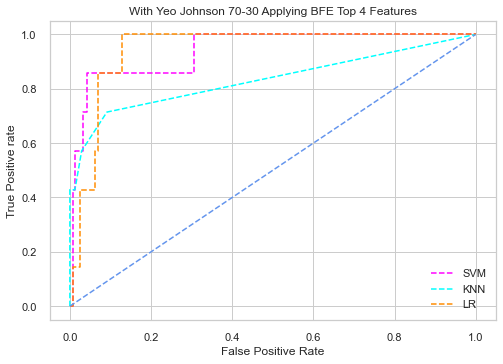

In [48]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
sb.set_theme(style = 'whitegrid')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'magenta', label = 'SVM')
plt.plot(fpr7, tpr7, linestyle = '--', color = 'cyan', label = 'KNN')
plt.plot(fpr5, tpr5, linestyle = '--', color = 'darkorange', label = 'LR')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'cornflowerblue')
# title
plt.title('With Yeo Johnson 70-30 Applying BFE Top 4 Features')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
# plt.savefig("Resulted ROC/With Yeo Johnson 70-30 Applying BFE Top 4 Features.png", dpi=300)

plt.show();